In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

In [5]:
adult_train_df = pd.read_csv('adult.data', header = None)
adult_test_df = pd.read_csv('adult.test', header = None, skiprows = 1)
adult_train_df.columns = names
adult_test_df.columns = names

In [6]:
adult_train_df.shape, adult_test_df.shape

((32561, 15), (16281, 15))

In [8]:
adult_train_df.sample(4, random_state = 42)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [9]:
adult_test_df.sample(4, random_state = 42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K.
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K.
9933,54,Local-gov,116428,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


In [10]:
adult_test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [11]:
adult_train_df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [12]:
adult_test_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [13]:
for col in adult_train_df.columns:
    if adult_train_df[col].dtype == object:
        print(col, adult_train_df[col].str.contains(' \?').sum())

workclass 1836
education 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
native-country 583
class 0


In [14]:
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [15]:
for col in columns_with_na_vals:
    adult_train_df[col] = (adult_train_df[col].replace(to_replace = ' ?', value = np.nan))

In [16]:
for col in adult_train_df.columns:
    if adult_train_df[col].dtype == object:
        print(col, adult_train_df[col].str.contains(' \?').sum())

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
class 0


In [17]:
adult_train_df = adult_train_df.dropna()
adult_test_df = adult_test_df.dropna()
adult_train_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
pd.DataFrame([adult_train_df.dtypes, adult_test_df.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education-num,int64,int64
marital-status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [19]:
for col in adult_train_df.columns:
    if adult_train_df[col].dtype == object:
        adult_train_df[col] = adult_train_df[col].astype('category')

for col in adult_test_df.columns:
    if adult_test_df[col].dtype == object:
        adult_test_df[col] = adult_test_df[col].astype('category')

In [20]:
pd.DataFrame([adult_train_df.dtypes, adult_test_df.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,category,category
fnlwgt,int64,int64
education,category,category
education-num,int64,int64
marital-status,category,category
occupation,category,category
relationship,category,category
race,category,category
sex,category,category


In [21]:
adult_train_df.to_pickle('adult_train.p')

In [22]:
adult_test_df.to_pickle('adult_test.p')

In [23]:
adult_train_df = pd.read_pickle('adult_train.p')

In [24]:
adult_train_stats_df = adult_train_df.describe().T
adult_train_stats_df

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


In [25]:
adult_train_stats_df.index

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [26]:
skew_values = list()
for num_col in adult_train_stats_df.index:
    num_col_skew = stats.skew(adult_train_df[num_col])
    skew_values.append(num_col_skew)
adult_train_stats_df['skew'] = skew_values
adult_train_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0,0.530201
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0,1.459147
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0,-0.305363
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0,11.902090
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0,4.526155
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0,0.330853


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

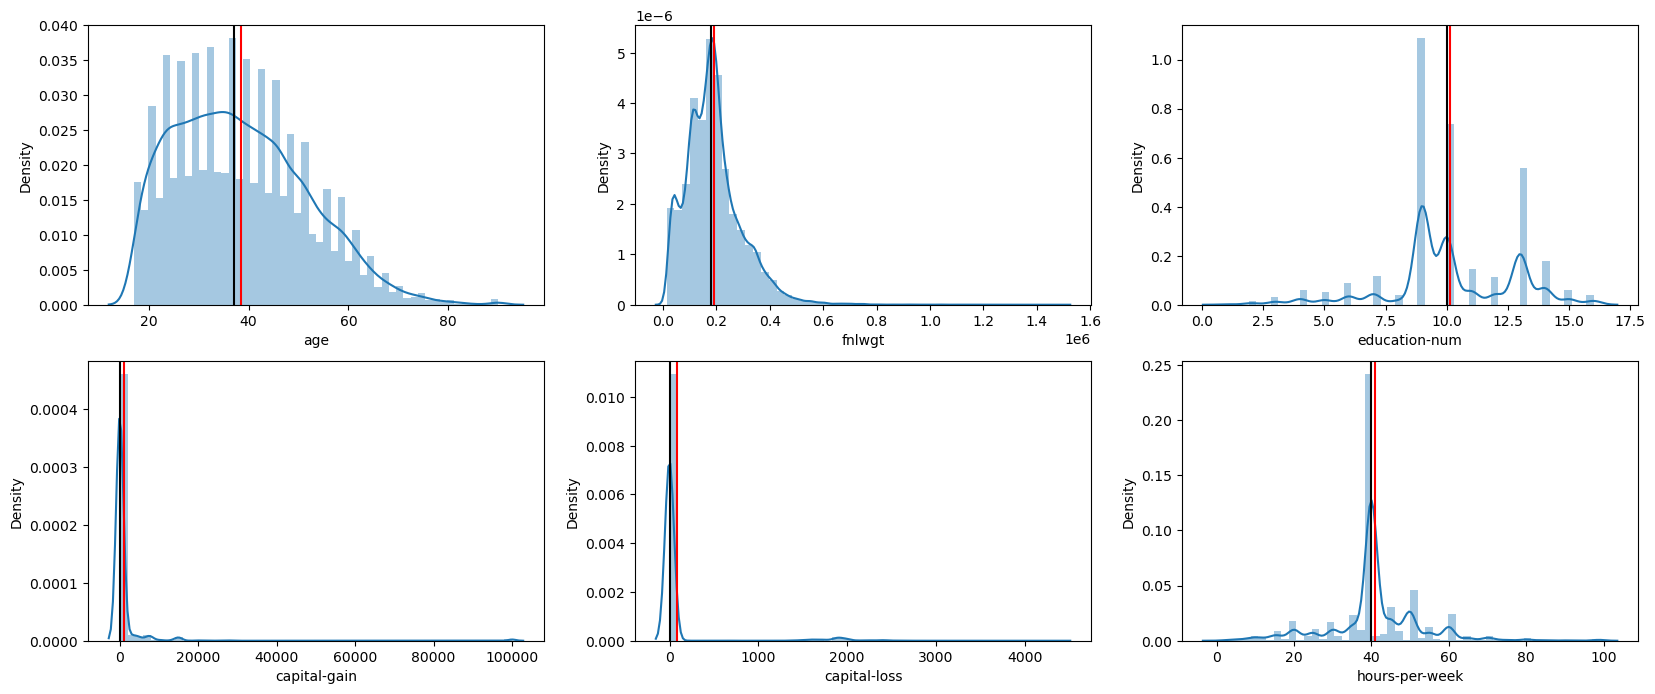

In [27]:
fig = plt.figure(figsize=(20,8))

for i, num_col in enumerate(adult_train_stats_df.index):
    fig.add_subplot(2,3,1+i)
    sns.distplot(adult_train_df[num_col])
    
    mean_value = adult_train_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = adult_train_df[num_col].median()
    plt.axvline(median_value, c='black')

In [28]:
(adult_train_df['capital-gain'] > 99998).sum()

148

In [29]:
num_features_index = adult_train_stats_df.index

In [30]:
num_features_index, adult_train_df.columns

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'class'],
       dtype='object'))

In [31]:
cat_features_list = [col for col in adult_train_df.columns if col not in num_features_index]
cat_features_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


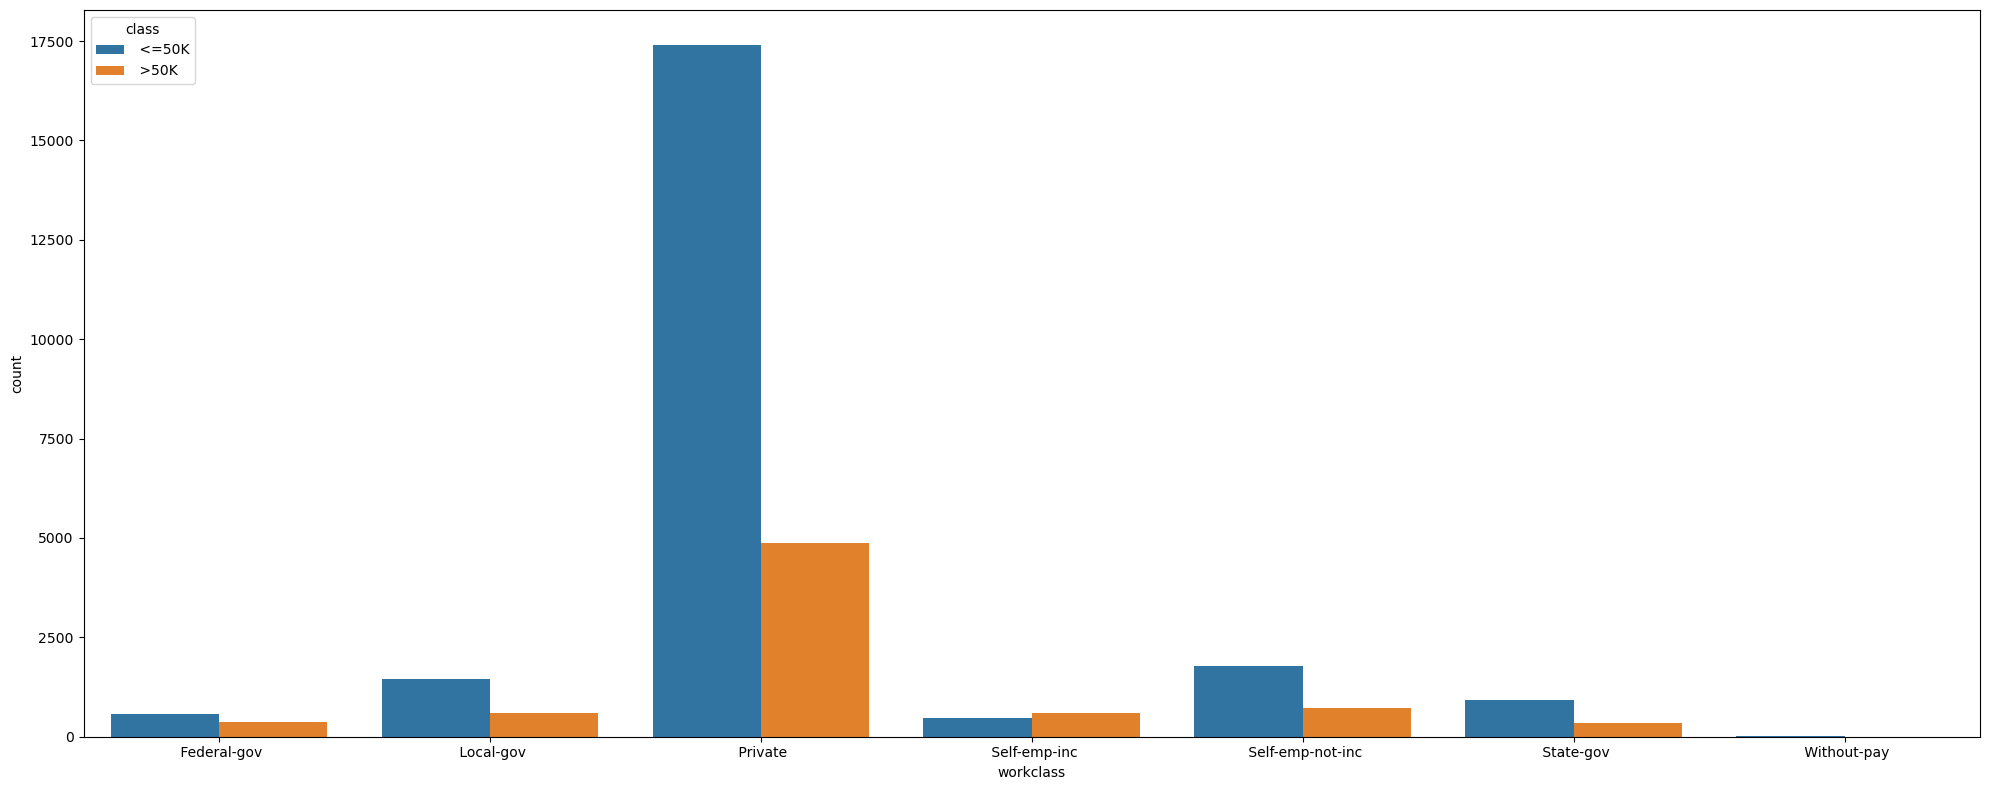

In [32]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('workclass', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


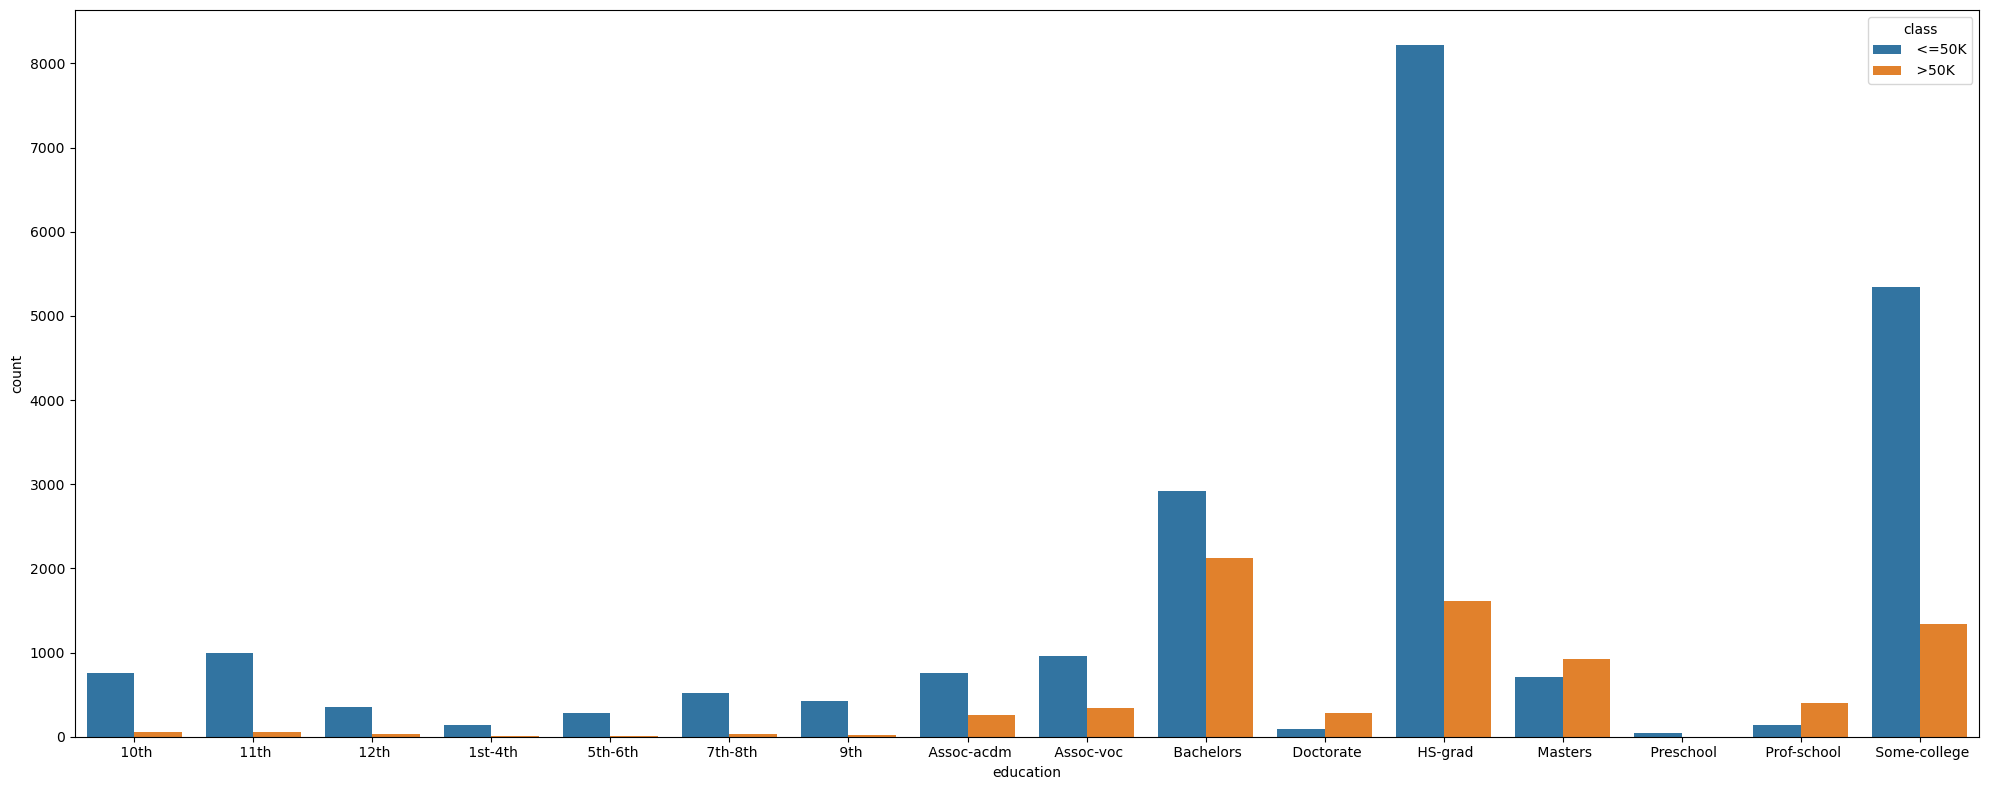

In [33]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('education', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


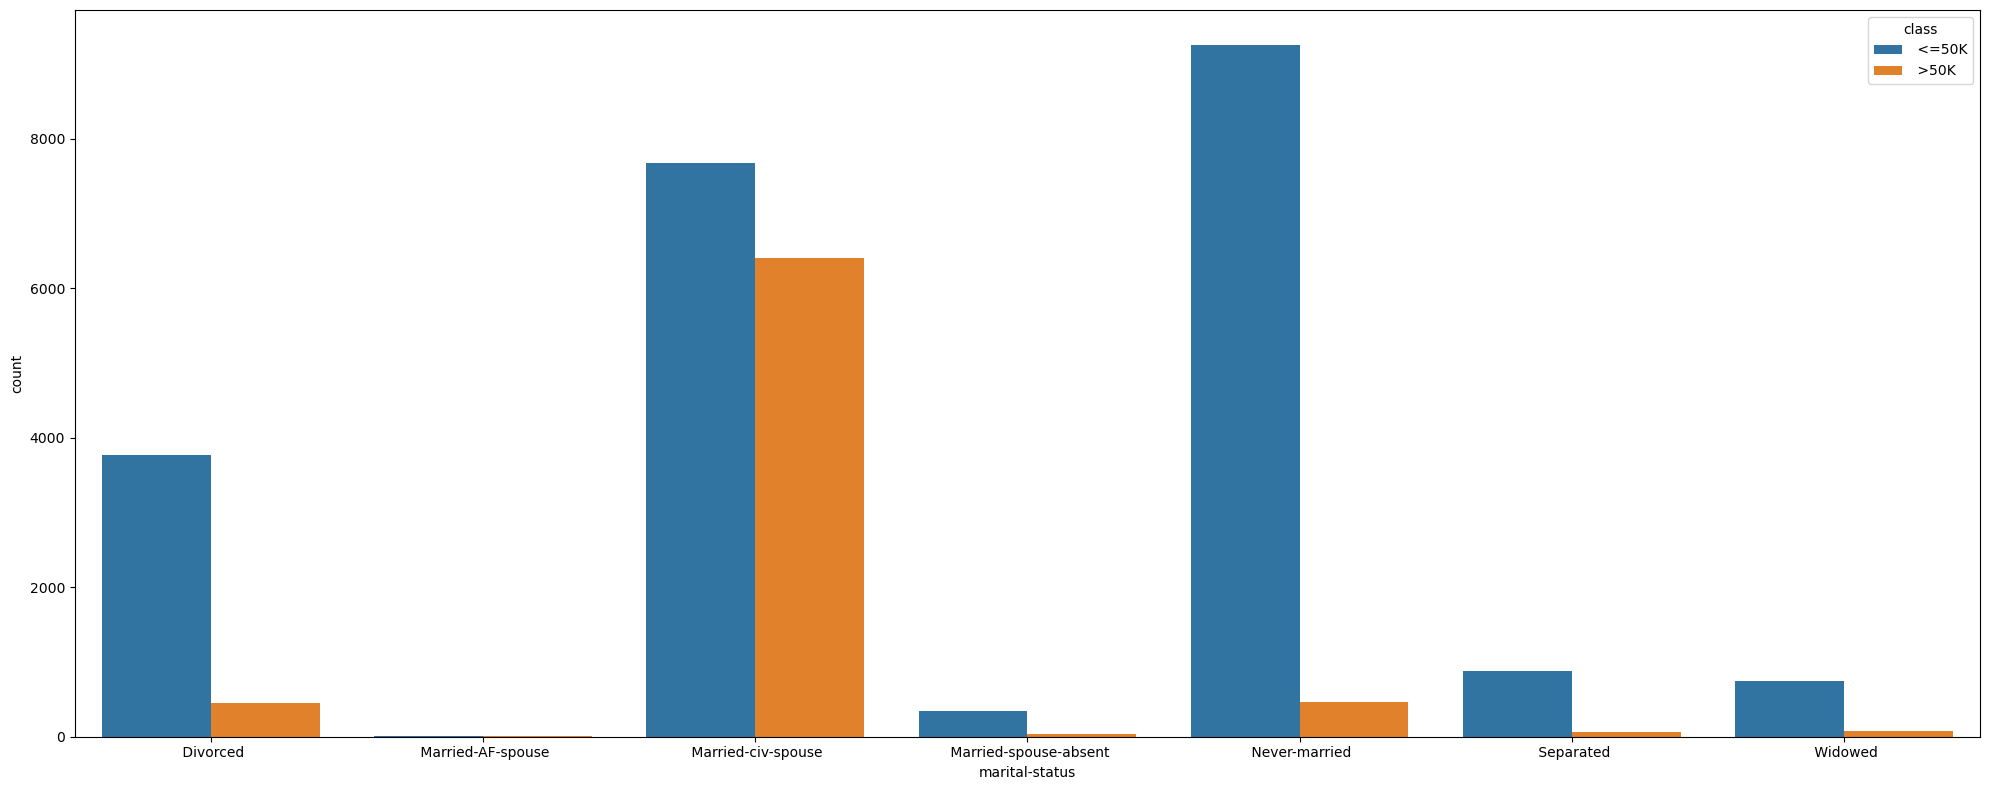

In [34]:
fig = plt.figure(figsize = (20,8))
sns.countplot('marital-status', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


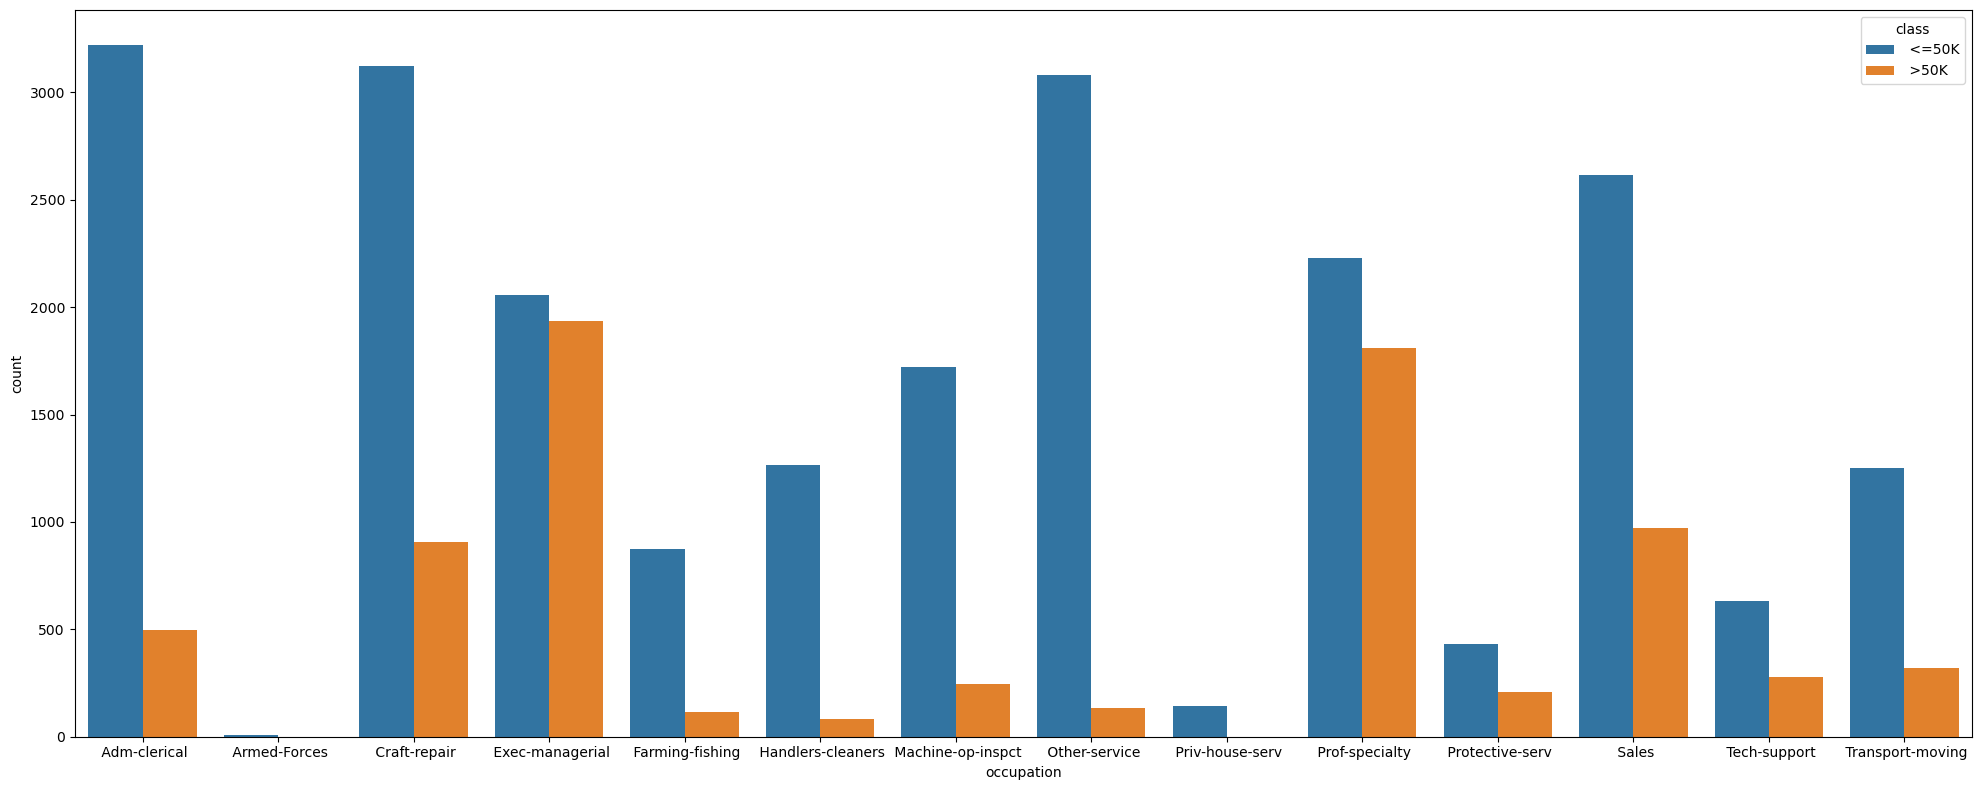

In [35]:
fig = plt.figure(figsize = (20,8))
sns.countplot('occupation', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


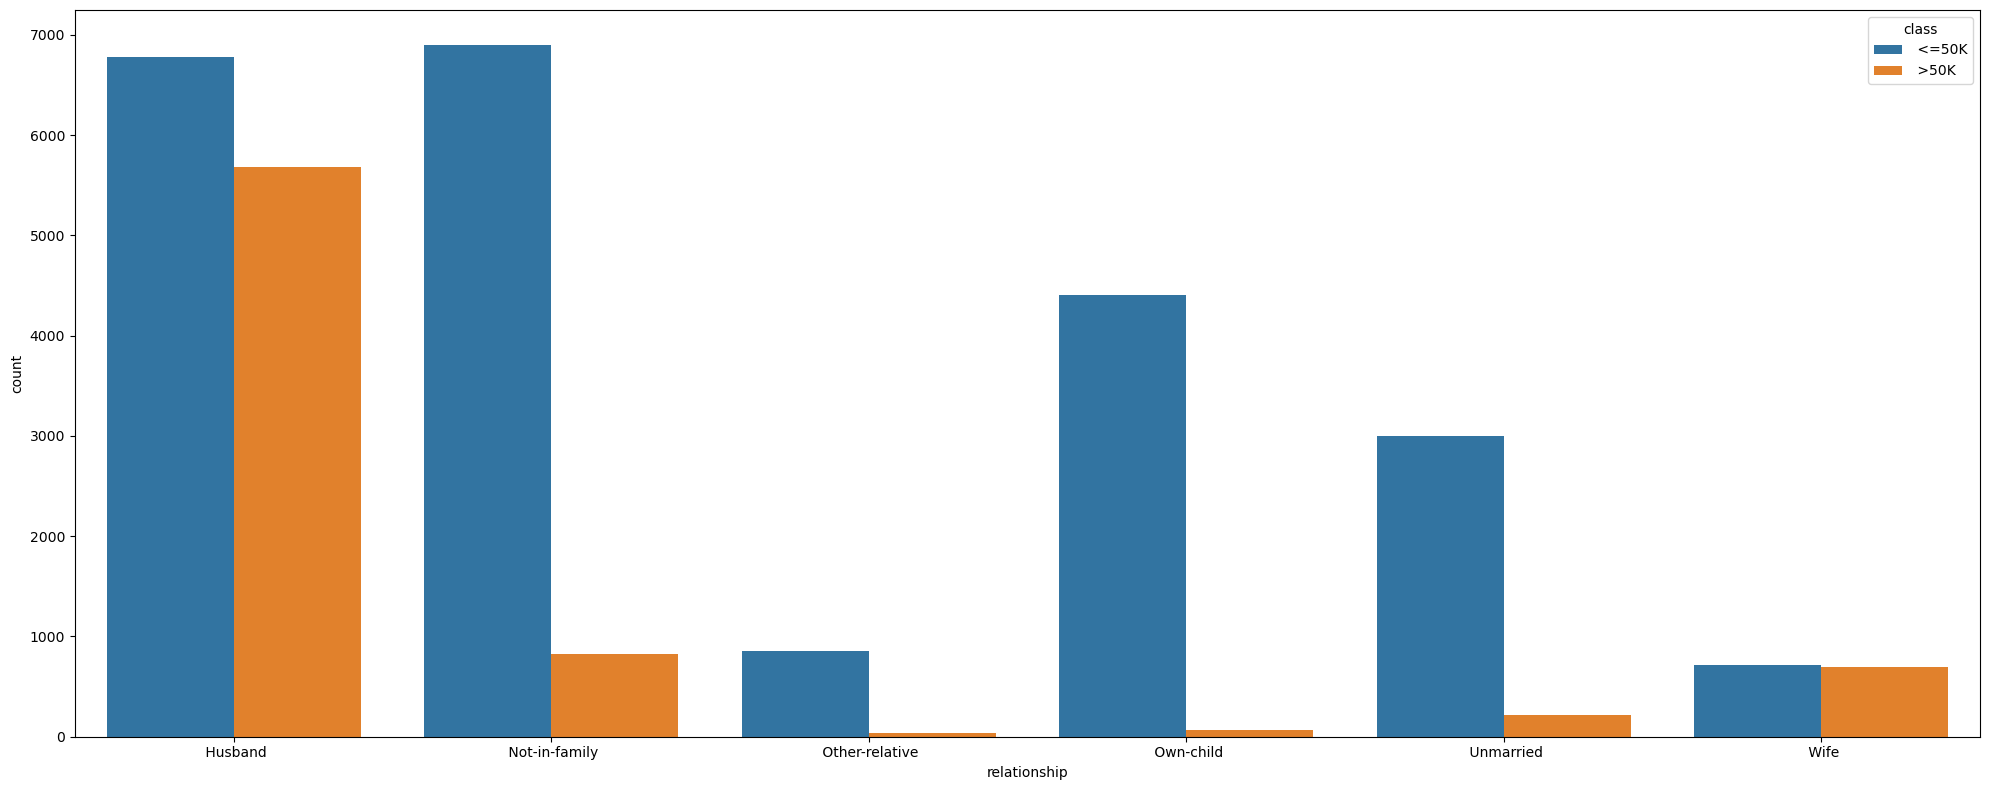

In [36]:
fig = plt.figure(figsize = (20,8))
sns.countplot('relationship', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


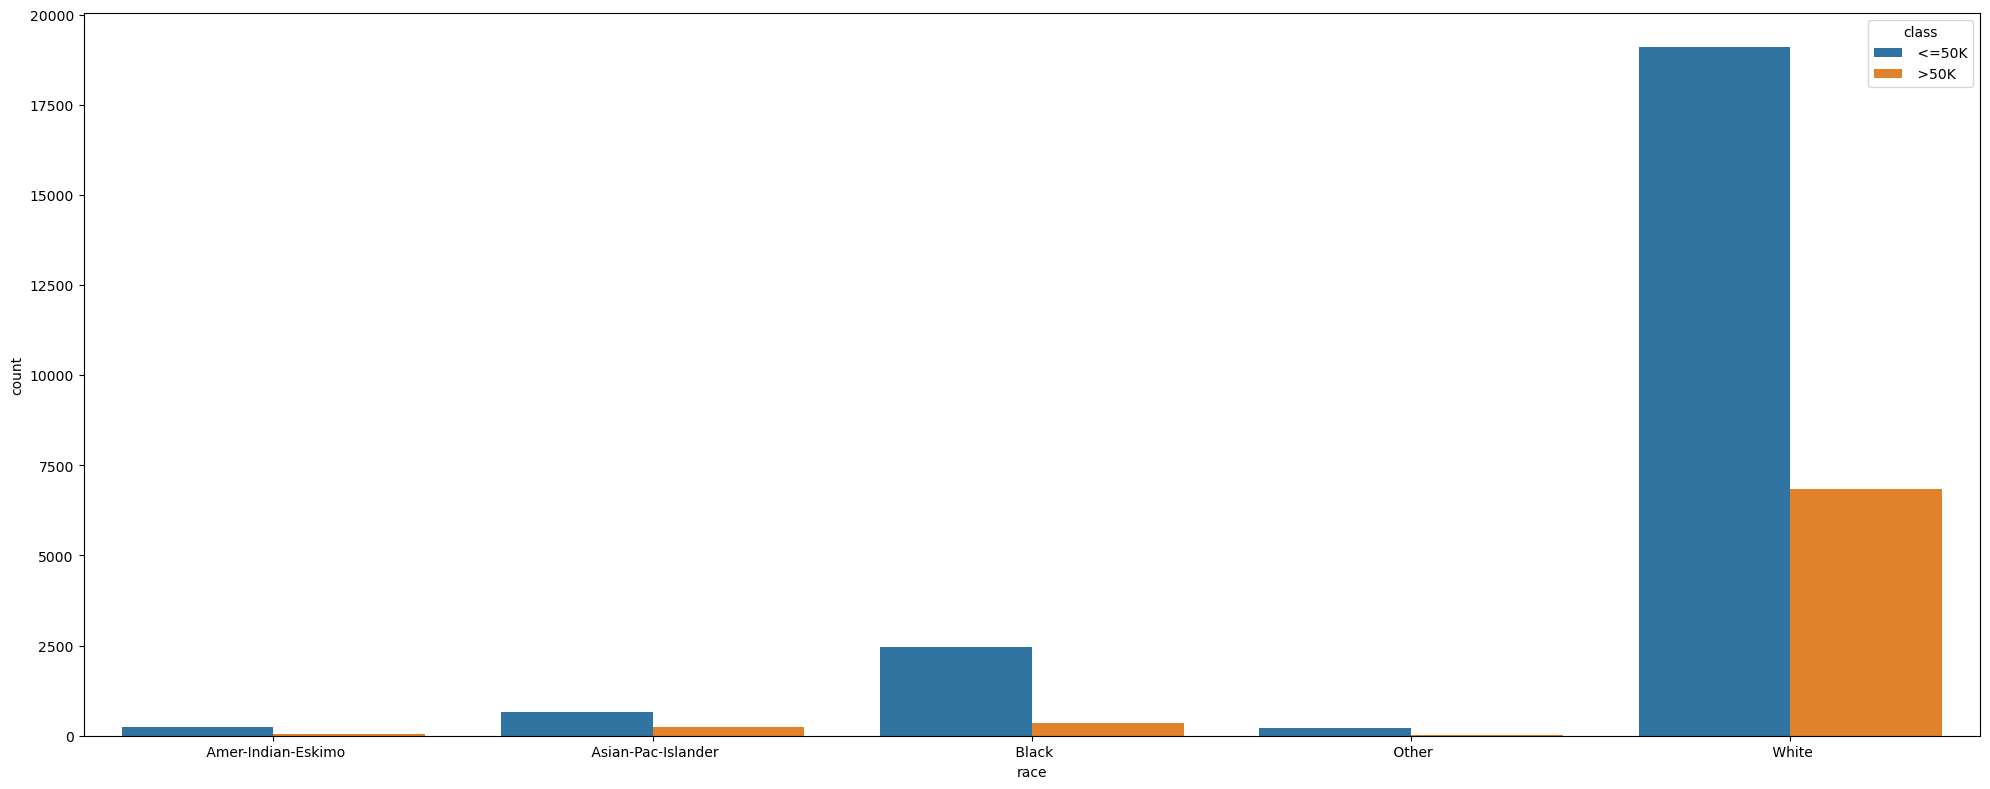

In [37]:
fig = plt.figure(figsize = (20,8))
sns.countplot('race', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


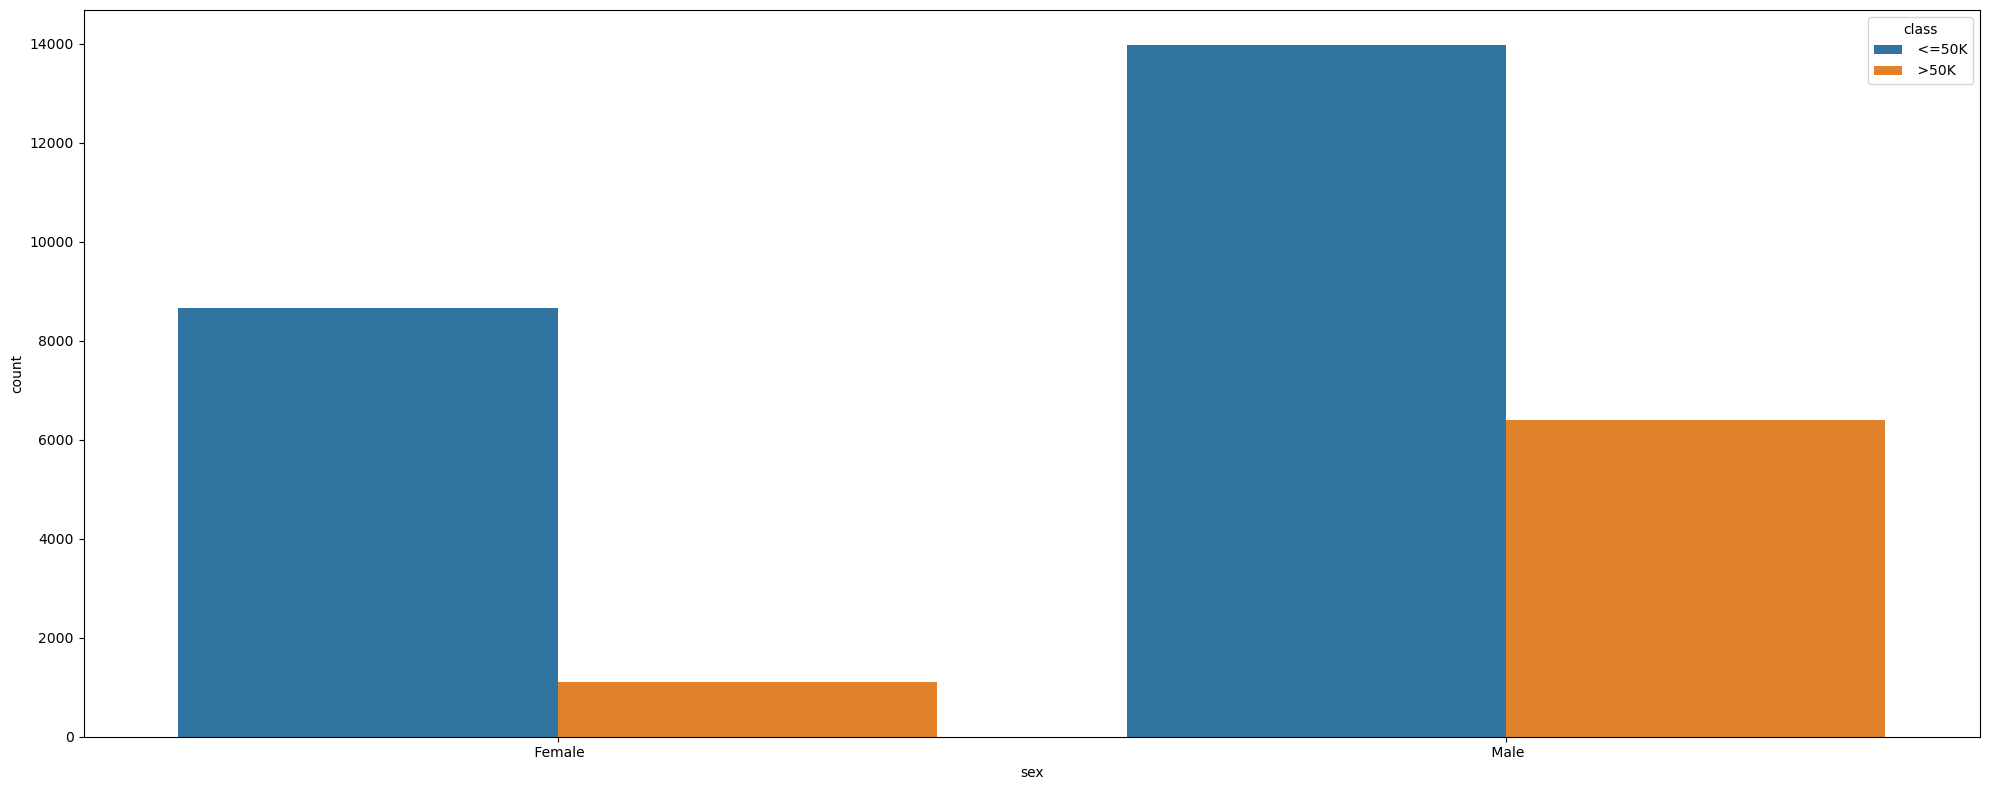

In [38]:
fig = plt.figure(figsize = (20,8))
sns.countplot('sex', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


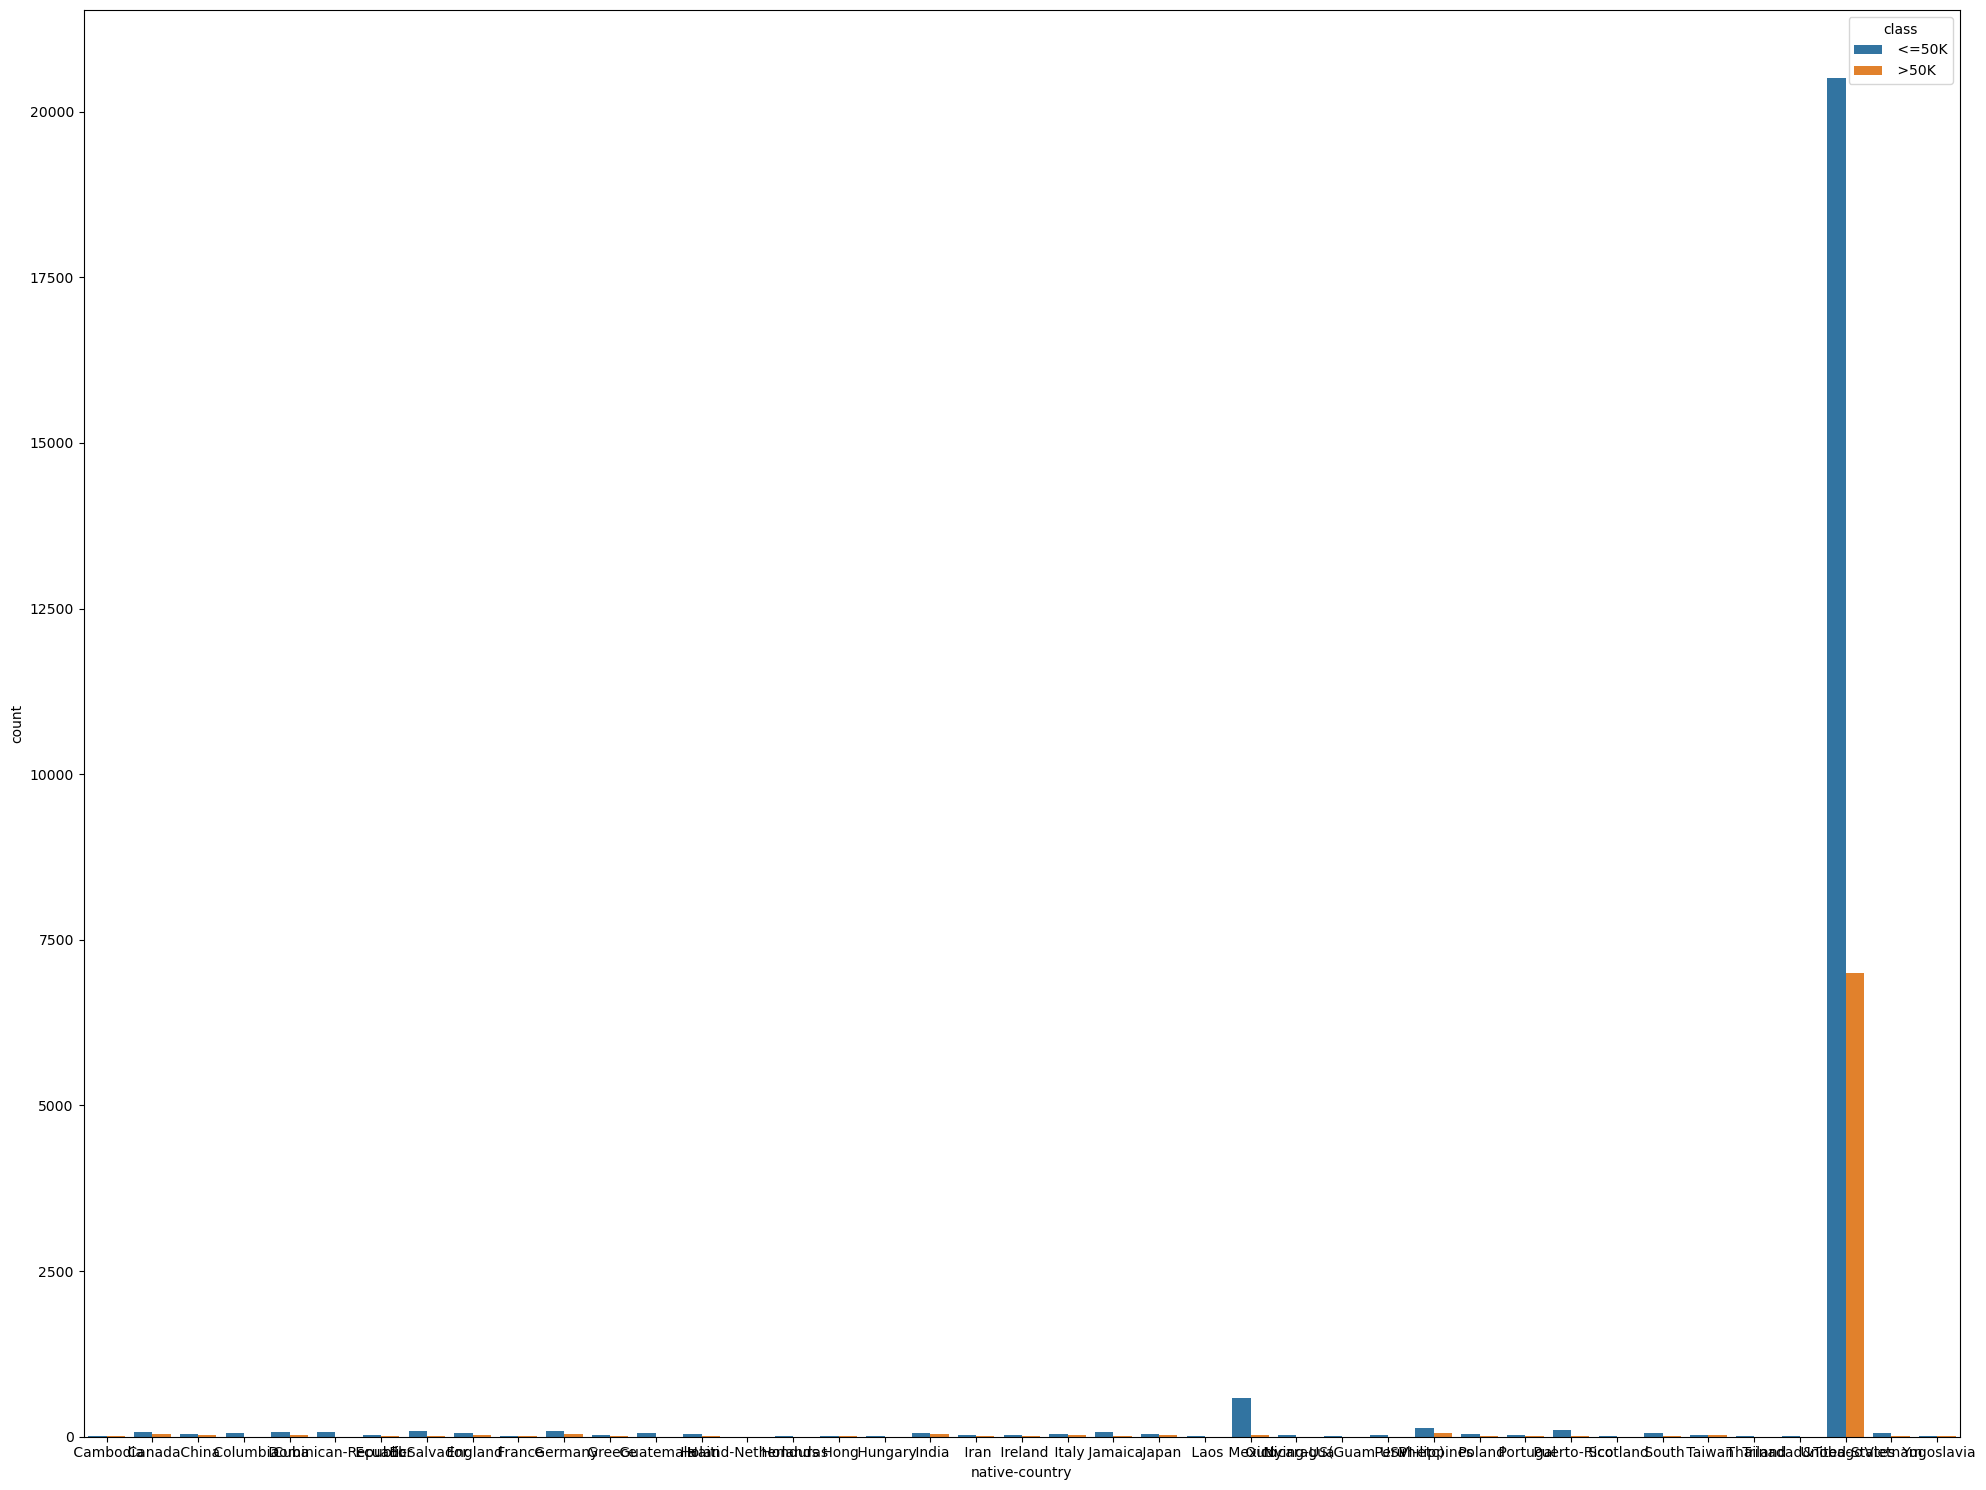

In [39]:
fig = plt.figure(figsize = (20,15))
sns.countplot('native-country', hue = 'class', data = adult_train_df)
plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


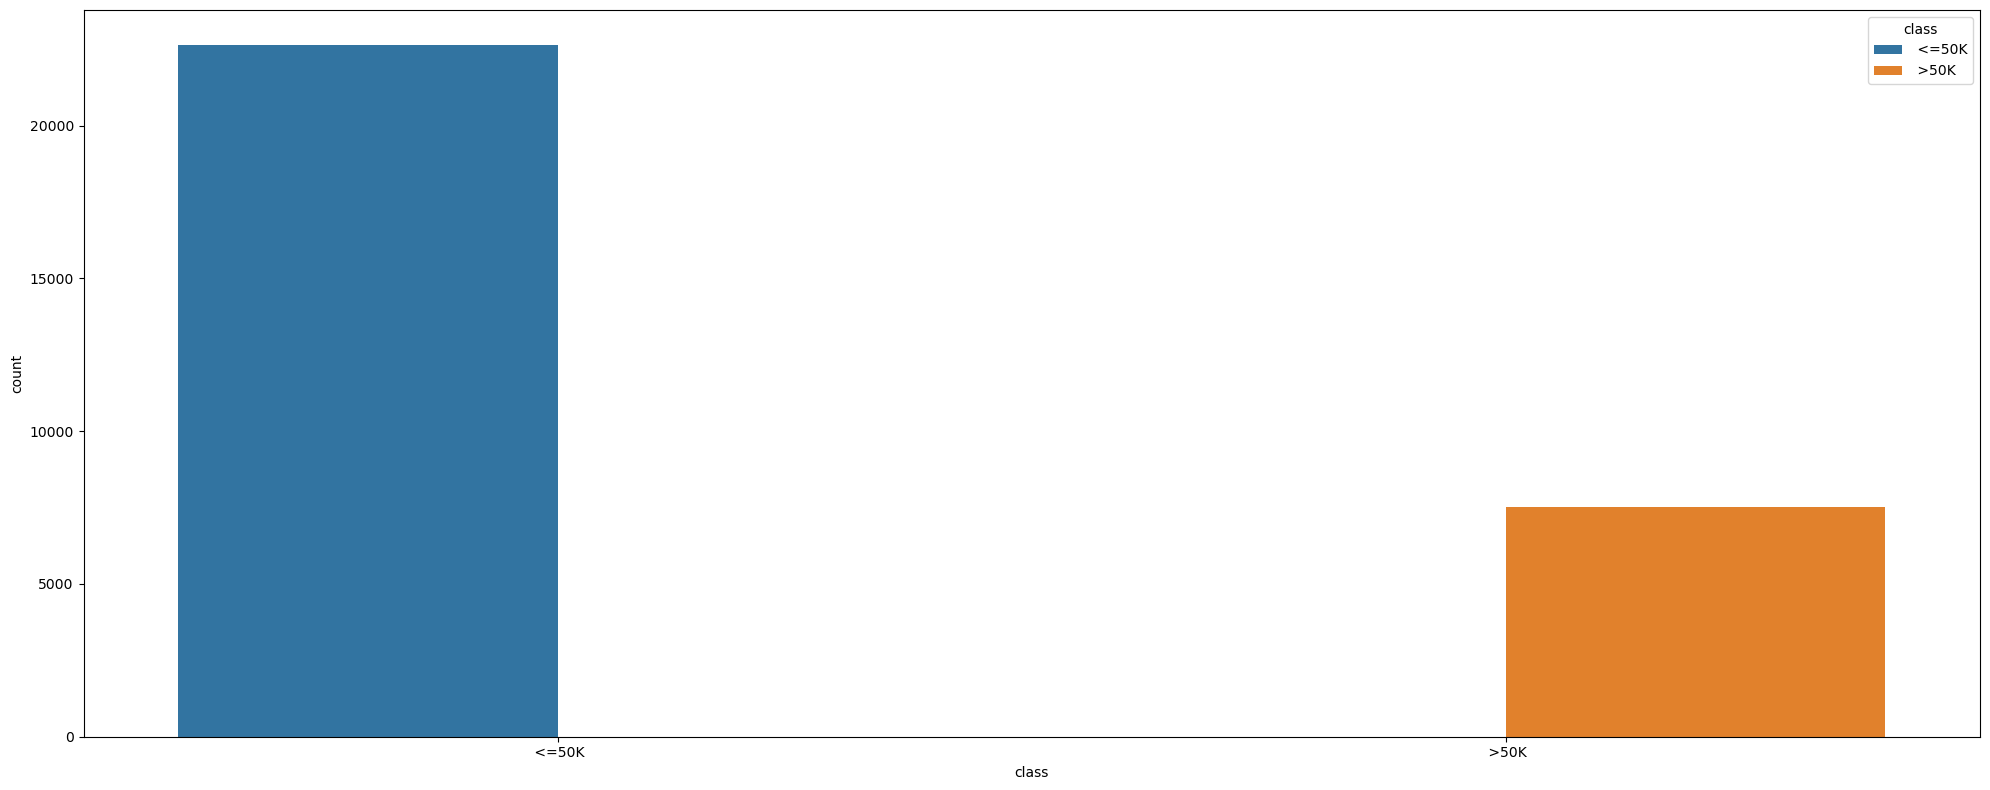

In [40]:
fig = plt.figure(figsize = (20,8))
sns.countplot('class', hue = 'class', data = adult_train_df)
plt.tight_layout()